<a href="https://colab.research.google.com/github/parkgunha/Chagawa_project/blob/main/%EC%84%A0%ED%98%84%EC%88%98_%EC%8B%AC%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.11.11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#파일 업로드
from google.colab import files
files.upload()

In [ ]:
#3. 다운로드한 파일 확인 및 압축 해제
import zipfile
import os

# Kaggle 데이터셋 ZIP 파일 이름
zip_file = "used_car copy.zip"

# 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("database")

In [ ]:
# 데이터 파일 확인
input_path = '/content/database/used_car copy'  # 데이터셋이 저장된 경로
file_paths = []
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)
print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")

총 11개의 CSV 파일을 발견했습니다.


In [7]:
# CSV 파일 읽기 및 병합
import pandas as pd
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)

NameError: name 'file_paths' is not defined

In [ ]:
# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")

# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

병합된 데이터 크기: (108540, 11)
데이터의 첫 5행 미리보기:
   model  year  price transmission  mileage fuelType    tax   mpg  engineSize  \
0   GT86  2016  16000       Manual    24089   Petrol  265.0  36.2         2.0   
1   GT86  2017  15995       Manual    18615   Petrol  145.0  36.2         2.0   
2   GT86  2015  13998       Manual    27469   Petrol  265.0  36.2         2.0   
3   GT86  2017  18998       Manual    14736   Petrol  150.0  36.2         2.0   
4   GT86  2017  17498       Manual    36284   Petrol  145.0  36.2         2.0   

  carMake  tax(£)  
0  toyota     NaN  
1  toyota     NaN  
2  toyota     NaN  
3  toyota     NaN  
4  toyota     NaN  


In [9]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/full_2_data.csv'
full2_data =  pd.read_csv(file_path)

In [10]:
# df = full2_data.copy()
# str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
# for i in str_list:
#   df[i] = df[i].str.strip()
# full3_data = df.copy()
# full3_data.to_csv("full3_data.csv")
# del full3_data['tax(£)']
# full3_data.dropna().info()
# df = full3_data.dropna()
# str_list = ['model', 'transmission', 'fuelType', 'carMake'] # 명목변수
# # 이산형 'year'
# # 연속형 'price','mileage','tax','tax(£)', 'engineSize'

KeyError: 'tax(£)'

In [ ]:
# df = full3_data.copy()
# if "tax(£)" in df.columns:
#   df['tax'] = pd.concat([df['tax'], df['tax(£)']], axis=0).dropna()
#   del df['tax(£)']
# df.info()
# full4_data = df.copy()
# full4_data.to_csv("full4_data.csv")

In [ ]:
#EDA 1단계 데이터 타입및 구조 파악
df = full4_data.copy()
#df.shape #  (108540, 11)
#df.info() #'tax':945327, 'mpg':99187, 'tax(£)':4860으로 NaN 존재
# 명목변수 ['model', 'transmission', 'fuelType', 'carMake']

#len(df['model'].unique()) # 195개
#df['model'].value_counts().tail(20) # 모델중 데이터 수가 적은 것이 많다. 회귀분석을 위한 5개 미만은 제거
# model_cnt = df['model'].value_counts().reset_index()
# filter_model = model_cnt[model_cnt['count'] < 5]['model']
# df = df[~df['model'].isin(filter_model)]
#df['transmission'].unique() # 'Manual', 'Automatic', 'Semi-Auto', 'Other
#df['transmission'].hist() # 수동:자동: 반자동 =3:1:1'
#df['transmission'].value_counts() # 61308,24903,22319,기타는 10개만 있음
#df['fuelType'].unique() # 'Petrol', 'Other', 'Hybrid', 'Diesel', 'Electric'
#df['fuelType'].hist() # 휘빌유와 디젤이 주로 있음, 나머지는 적음
#df['fuelType'].value_counts() # Petrol:	59,875, Diesel:45,177, Hybrid:3,229, Other:253, Electric:6
# df['carMake'].unique() # 'toyota', 'audi', 'merc', 'bmw', 'hyundai', 'vauxhall', 'ford', 'vw', 'skoda', 'cclass' => 'ford:focus' 'bmw:cclass' 중복
#'ford:Focus' 'bmw:cclass' 중복여부 확인 중복이면 삭제, 아니면 중첩

#df['carMake'].value_counts()
#cross_tab = pd.crosstab(df['carMake'], df['model'])

# ford	17965 vw	15157 vauxhall	13632 merc	13119 bmw	10781 audi	10668
# toyota	6738 skoda	6267 focus	5454 hyundai	4860 cclass	389

In [ ]:
# 이산형 'year'
# 연속형 'price','mileage','tax','tax(£)', 'engineSize'
df.describe()
#df['year'].hist() # 2020년 대다수
#df['year'].plot.box() # 2060년 1980년은 이상치 라고 판단
# #df['year'].hist()
# df[df['year'] < 1994] #Petrol C Class 출시일: 1993 이상치
# df= df[(df['year'] > 1994) & (df['year'] < 2025) ]
# df = df[(df['year'] > 1994) & (df['year'] < 2025)]
# # df['year'].hist()
### 모델명으로만 필터하기에는 무리가 있음 모델의 세대마다 출시일이 다름.
# df = df[(df['year'] >= 2014) &(df['year'] <= 2020)] # merc m class 출시일: 1996년 vauxhall Zafira 출시일: 2006년

engineSize    265
dtype: int64
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]


<ipython-input-31-0a676b7ad0c0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engineSize_Price['engineSize_g'] = pd.cut(df['engineSize'], bins=bins, labels=labels, right=False)


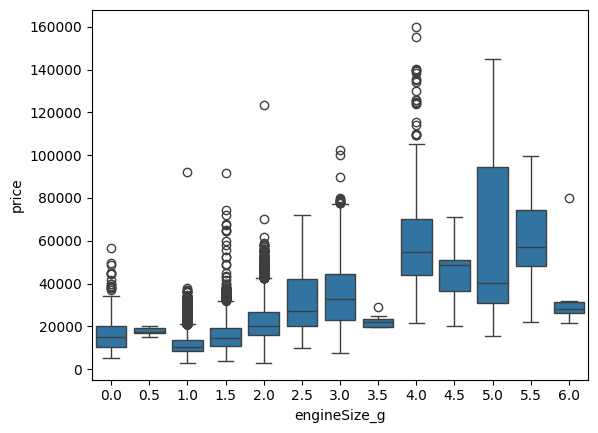

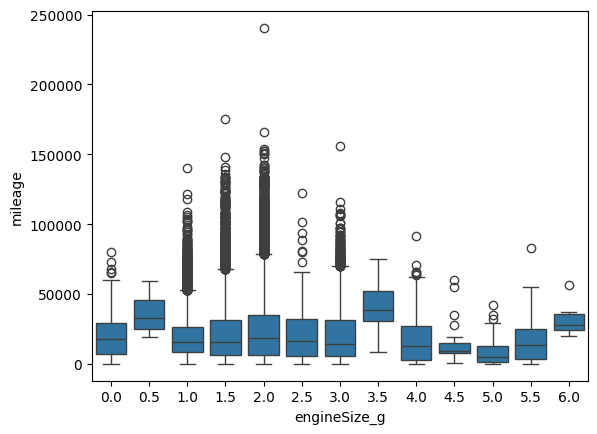

In [ ]:
#df['price'].hist() # 오른쪽 긴 꼬리 모양
#df['price'].plot.box() # 모델마다 가격 확인 필요, 모델의 수가 너무 많음 IQ
#df['price'].describe() # 너무 낮은 가격이 존재 이를 어떻게 걸러낼 건인가? £ 한국 환율 1,781
#df[df['price']< 1000] # £ 1000 ~~ 178,0000
#df['mileage'].hist() # 오른쪽 긴 꼬리 모양
#df['mileage'].describe() # mileage 1 ~~1.6KM
#df[df['mileage']<10] #16KM면 사실 새차 아님??
#df['tax'].hist() # 긴꼬리가 보이나 앞 쪽이 다수
#df['tax'].plot.box()
#df['mpg'].hist() # 긴 꼬리가 보임
#df['mpg'].plot.box()
#df['engineSize'].plot.box() # 엔진 사이즈은 세금과 연관 되어 있다고 함
#df['engineSize'].describe() # 엔진 사이즈가 0은 뭔데??
import numpy as np
df['engineSize'].describe()
df['engineSize'].value_counts().sort_index(ascending=False)
print(df[df['engineSize']== 0][['engineSize']].count())
bins = np.arange(0,7,0.5)
print(bins)
labels =  np.arange(0,6.5,0.5)
engineSize_Price = df[['engineSize','price', 'mileage']]
engineSize_Price['engineSize_g'] = pd.cut(df['engineSize'], bins=bins, labels=labels, right=False)
sns.boxplot(data=engineSize_Price, x='engineSize_g', y='price')
plt.show()
sns.boxplot(data=engineSize_Price, x='engineSize_g', y='mileage')
plt.show()

#df[df['engineSize'] < 1].sort_values(by='engineSize')
#df['carMake'].hist() # 비율은 다양함


In [ ]:
df[df['engineSize']==0][['fuelType']].value_counts()

,count
fuelType,
Petrol,158
Diesel,66
Hybrid,38
Electric,2
Other,1


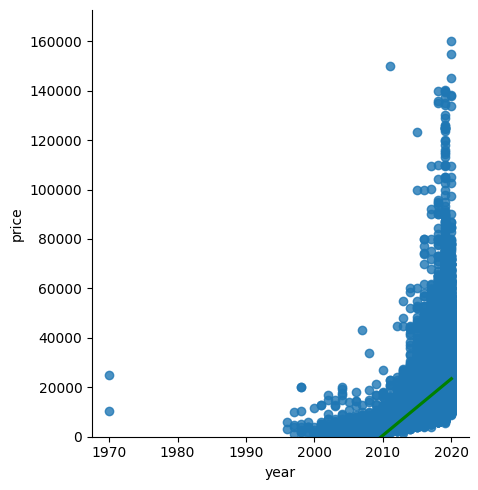

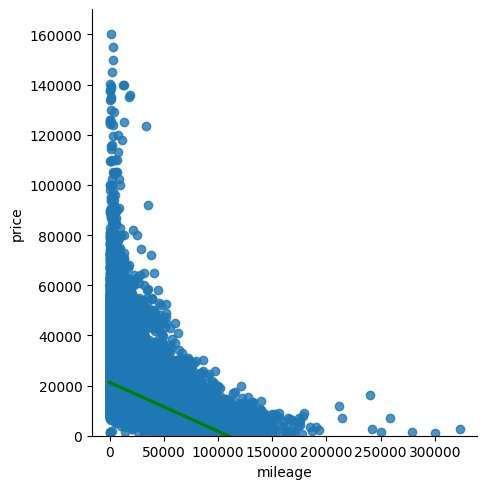

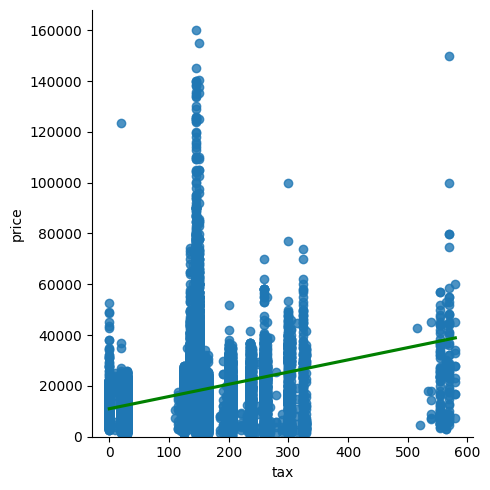

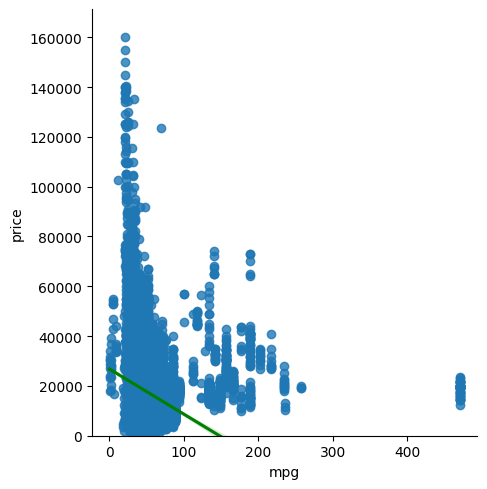

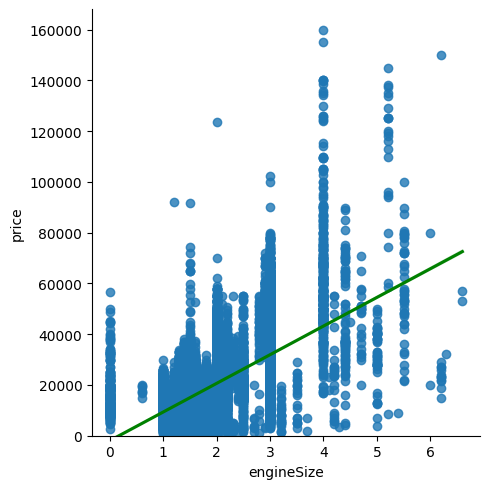

In [11]:
# 가격별 산점도(선형성 확인)
import seaborn as sns
import matplotlib.pyplot as plt
# 이산형 'year'
# 연속형 'price','mileage','tax','tax(£)', 'engineSize'
num_colums = df._get_numeric_data().columns.tolist()
# sns.lmplot(data= df, x='year', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()
# sns.lmplot(data= df, x='mileage', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()

for i in num_colums:
  if i != 'price':
    sns.lmplot(data= df, x=i, y='price',
        line_kws={'color':'green'}
    )
    plt.ylim(0)
    plt.show()

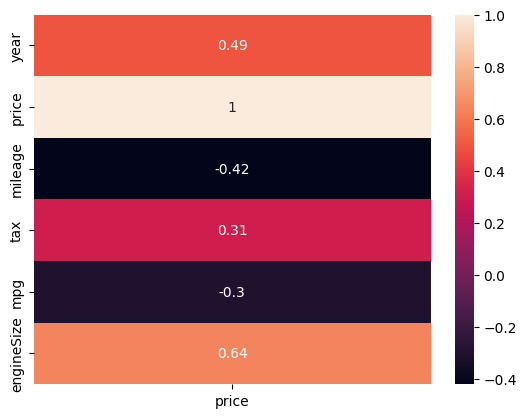

In [ ]:
correlation_matrix = df[num_colums].corr()
sns.heatmap(correlation_matrix[['price']], annot=True)
plt.show()

In [ ]:
# 가격별 산점도(선형성 확인)-> 변화후 확인
import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()

#
# sns.lmplot(data= df, x='year', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()
# sns.lmplot(data= df, x='mileage', y='price',
#     line_kws={'color':'green'}
# )
# plt.ylim(0)
# plt.show()

for i in num_colums:
  if i != 'price':
    sns.lmplot(data= df, x=i, y='price',
        line_kws={'color':'green'}
    )
    plt.ylim(0)
    plt.show()

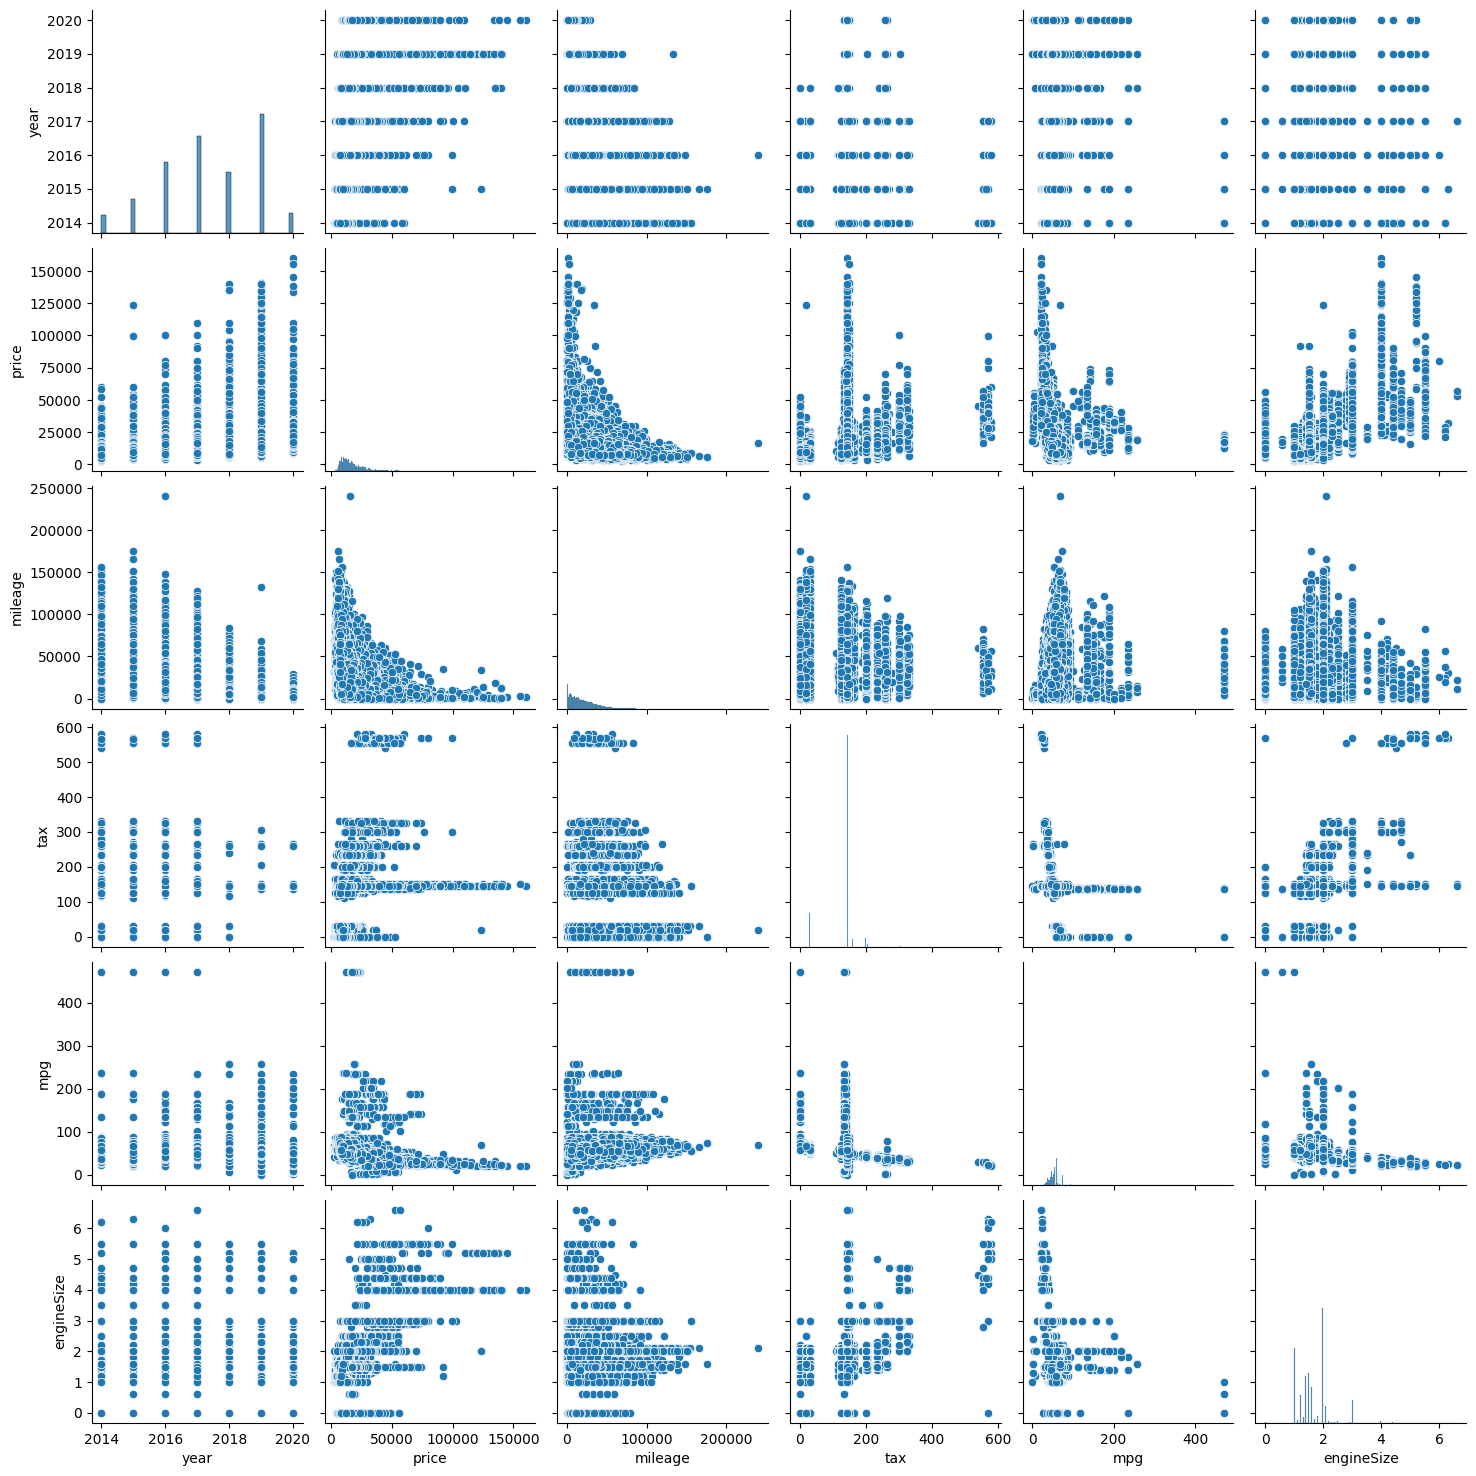

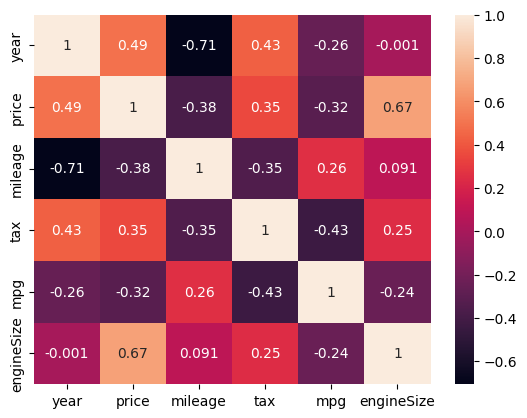

In [ ]:
# 독립변수가 여러개라서 변수간의 상관성 확인 필요-- VIF
import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()
correlation_matrix = df[num_colums].corr()
sns.pairplot(df[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_colums = df._get_numeric_data().columns.tolist()
num_df = df[num_colums].drop(['price'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])] # NaN 제거 하고 해야함
vif["features"] = num_df.columns
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
print(vif)
if vif['VIF Factor'][0] > 10:
  print("다중공선성 존재")
  print(vif[vif['VIF Factor'] > 10])
else:
  print("다중공선성 존재하지 않음")


   VIF Factor    features
0   38.875233        year
1   16.129261         mpg
2   11.344348  engineSize
3    6.989753         tax
4    2.795585     mileage
다중공선성 존재
   VIF Factor    features
0   38.875233        year
1   16.129261         mpg
2   11.344348  engineSize


In [ ]:
# 등분산성 확인

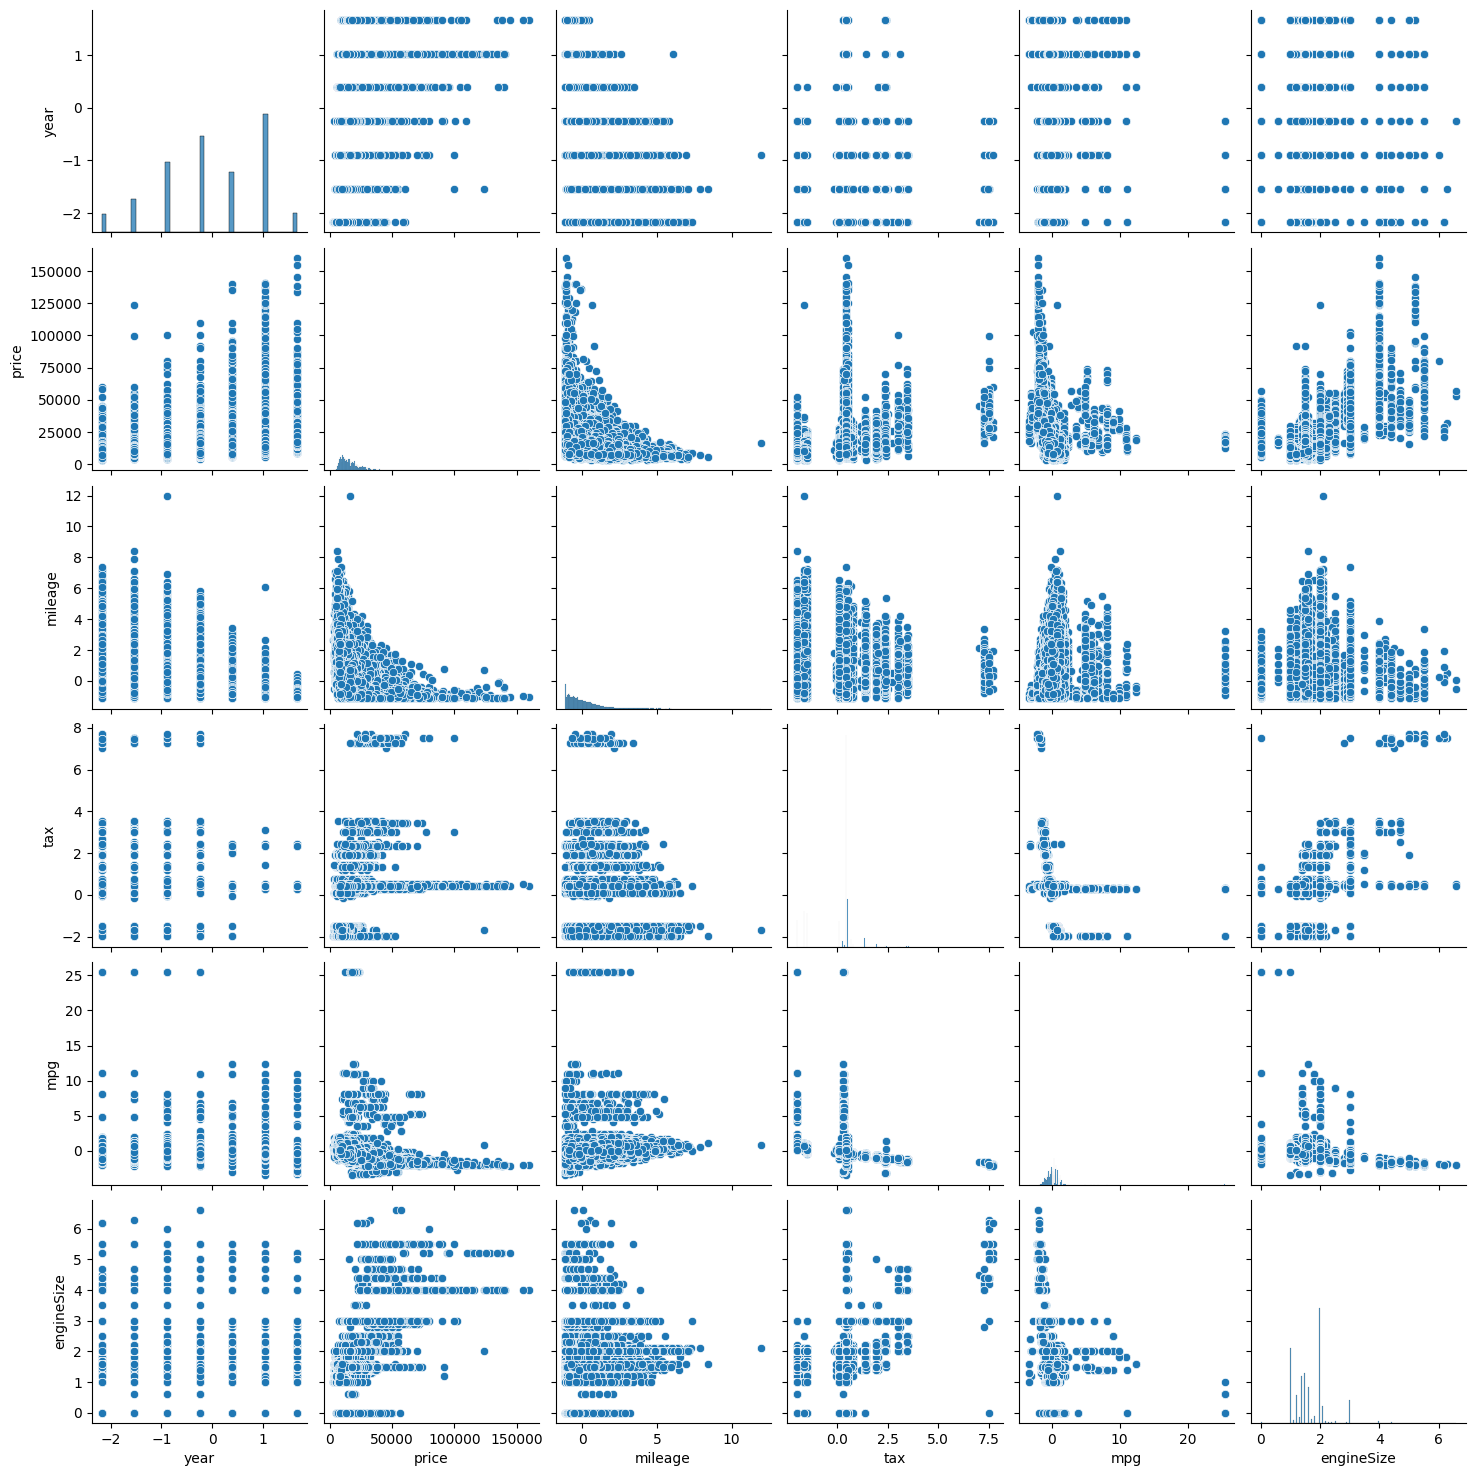

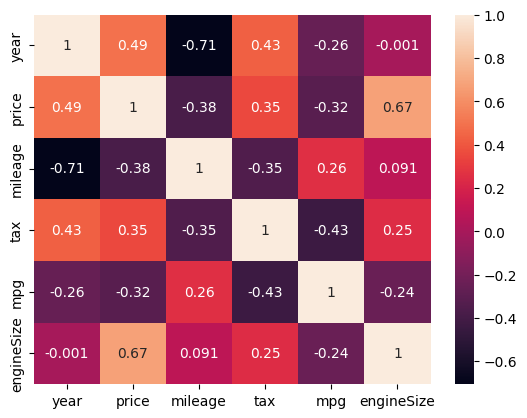

In [ ]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler

normalize_columns = ["year", "mileage", "tax", "mpg"]
scaler = StandardScaler()
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

df[normalize_columns].head()

import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()
correlation_matrix = df[num_colums].corr()
sns.pairplot(df[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [13]:
# 라벨 인코딩 => 빈도 인코딩
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

print(df.info)
print(df.isna().sum())
encoding_df=df.copy()
encoding_df['model'] = le.fit_transform(encoding_df['model'])

<bound method DataFrame.info of               model  year  price transmission  mileage fuelType    tax   mpg  \
0           Octavia  2017  10550       Manual    25250   Petrol  150.0  54.3   
1            Citigo  2018   8200       Manual     1264   Petrol  145.0  67.3   
2           Octavia  2019  15650    Automatic     6825   Diesel  145.0  67.3   
3      Yeti Outdoor  2015  14000    Automatic    28431   Diesel  165.0  51.4   
4            Superb  2019  18350       Manual    10912   Petrol  150.0  40.9   
...             ...   ...    ...          ...      ...      ...    ...   ...   
99181        Fiesta  2016   7999       Manual    31348   Petrol  125.0  54.3   
99182         B-MAX  2017   8999       Manual    16700   Petrol  150.0  47.1   
99183         B-MAX  2014   7499       Manual    40700   Petrol   30.0  57.7   
99184         Focus  2015   9999       Manual     7010   Diesel   20.0  67.3   
99185            KA  2018   8299       Manual     5007   Petrol  145.0  57.7   

       

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_colums = df._get_numeric_data().columns.tolist()
num_df = df[num_colums].drop(['price'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])] # NaN 제거 하고 해야함
vif["features"] = num_df.columns
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
print(vif)
if vif['VIF Factor'][0] > 10:
  print("다중공선성 존재")
  print(vif[vif['VIF Factor'] > 10])
else:
  print("다중공선성 존재하지 않음")

   VIF Factor    features
0    2.162080        year
1    2.029759     mileage
2    1.432428         tax
3    1.255267         mpg
4    1.012914  engineSize
다중공선성 존재하지 않음


In [90]:
# 데이터 분할 및 인코딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

def incoding(df) :
  # 라벨 인코딩 => 빈도 인코딩
  le  = LabelEncoder()

  encoding_df=df.copy()
  encoding_df['model'] = le.fit_transform(encoding_df['model'])

  # 데이터 분할
  X = encoding_df.drop(columns='price')
  y = encoding_df['price']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

  # 원 핫 인코딩
  str_list = ['transmission', 'fuelType', 'carMake']
  for i in str_list:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    # fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
    train_transmission = ohe.fit_transform(X_train[[i]]) # numpy.array
    train_transmission_df = pd.DataFrame(train_transmission, columns=[i + col for col in ohe.categories_[0]])
    X_train = pd.concat([X_train.reset_index(drop=True), train_transmission_df], axis=1)
    del X_train[i]
    # test
    X_test_transmission = ohe.transform(X_test[[i]])
    X_test_transmission_df = pd.DataFrame(X_test_transmission, columns=[i + col for col in ohe.categories_[0]])
    X_test = pd.concat([X_test.reset_index(drop=True), X_test_transmission_df], axis=1)
    del X_test[i]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = incoding(df)
X_train.head()

,model,year,mileage,tax,mpg,engineSize,transmissionAutomatic,transmissionManual,transmissionOther,transmissionSemi-Auto,...,fuelTypePetrol,carMakeaudi,carMakebmw,carMakeford,carMakehyundai,carMakemerc,carMakeskoda,carMaketoyota,carMakevauxhall,carMakevw
0,59,-0.041183,-0.312157,0.074442,-0.177647,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,124,0.902409,-0.910788,0.232794,3.874781,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,154,0.430613,0.522473,0.470322,0.559721,1.6,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,36,-0.512980,0.266566,-1.904961,4.915771,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13,-1.456572,3.165335,-1.904961,1.185555,1.6,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error, mean_absolute_error
import numpy as np

# 데이터 분할 및 인코딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

X_train, X_test, y_train, y_test = incoding(df)

# 선형모델 학습
rg = LinearRegression()
rg.fit(X_train, y_train)

# 예측  모델 평가
y_train_pred = rg.predict(X_train)
y_test_pred = rg.predict(X_test)
accuarcy = rg.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = rg.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 절대 오차(MAE): {mae:.3f}")
print(f"평균 제곱 오차(MSE): {rmse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape*100:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.783
평균 절대 오차(MAE): 2988.287
평균 제곱 오차(MSE): 4942.351
평균 절대비율 오차(MAPE): 23.236
결정 계수(R2): 0.757
정확도: 0.757


In [54]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # 예측값, 실제값 데이터 프레임
    result_df = pd.DataFrame(y_test.values, columns=['real_price'])
    result_df['predicted_price']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_price'] - result_df['predicted_price'])

    # 예측값과 실제값의 차이가 큰 순서로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, y_test_pred, n_tops=10)

       real_price  predicted_price      diff
24726      123456          16258.0  107198.0
1468       149948          55968.0   93980.0
15317       24999         -67759.0   92758.0
18769      139995          47412.0   92583.0
16517      140319          48869.0   91450.0
1069       138439          50461.0   87978.0
10283      134219          48731.0   85488.0
16464       92000          10172.0   81828.0
16181      145000          63772.0   81228.0
6527       125796          48307.0   77489.0


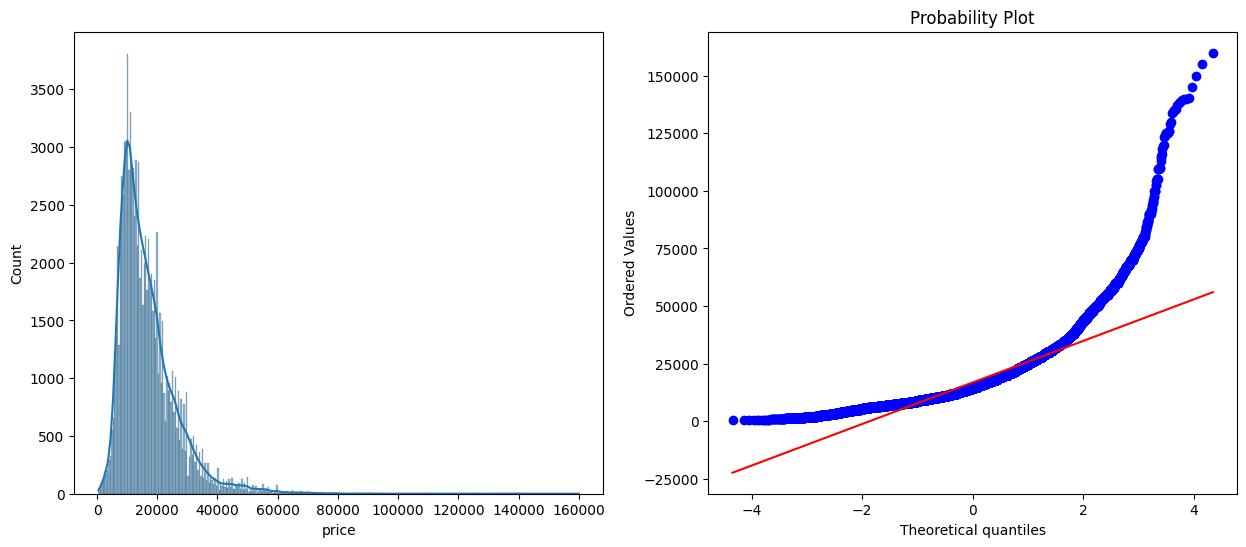

In [55]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(encoding_df["price"], ax =axs[0], kde=True)
stats.probplot(encoding_df["price"], dist='norm', fit=True, plot=axs[1]) # QQplot

plt.show()

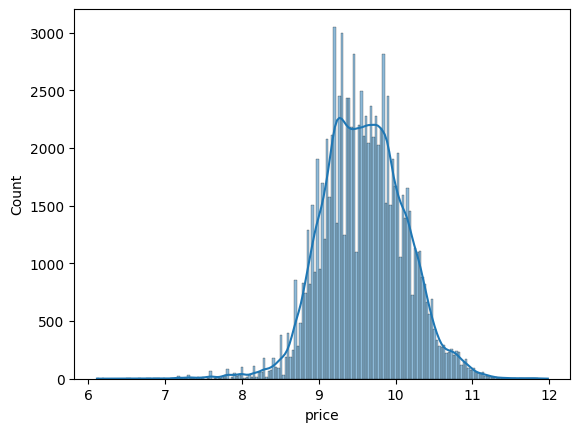

학습 정확도: 0.884
평균 절대 오차(MAE): 2337.696
RMSE: 3985.157
평균 절대비율 오차(MAPE): 0.140
결정 계수(R2): 0.842
정확도: 0.873


In [81]:
import numpy as np

sns.histplot(np.log1p(df["price"]), kde=True)
plt.show()

# 데이터 분할 및 인코딩
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np



# 라벨 인코딩 => 빈도 인코딩
le  = LabelEncoder()

encoding_df=df.copy()
encoding_df['model'] = le.fit_transform(encoding_df['model'])

# 데이터 로그 변환 후 분할
X = encoding_df.drop(columns='price')
y = encoding_df['price']
y_log = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.30, random_state=42)

# 원 핫 인코딩
str_list = ['transmission', 'fuelType', 'carMake']
for i in str_list:
  ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
  # fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
  train_transmission = ohe.fit_transform(X_train[[i]]) # numpy.array
  train_transmission_df = pd.DataFrame(train_transmission, columns=[i + col for col in ohe.categories_[0]])
  X_train = pd.concat([X_train.reset_index(drop=True), train_transmission_df], axis=1)
  del X_train[i]
  # test
  X_test_transmission = ohe.transform(X_test[[i]])
  X_test_transmission_df = pd.DataFrame(X_test_transmission, columns=[i + col for col in ohe.categories_[0]])
  X_test = pd.concat([X_test.reset_index(drop=True), X_test_transmission_df], axis=1)
  del X_test[i]

# 로그 변환 후 학습/예측
rg_log = LinearRegression()
rg_log.fit(X_train, y_train)
y_train_pred = rg_log.predict(X_train)
y_test_pred = rg_log.predict(X_test)

# 예측값, 실제값 원래 스케일로 변환
y_test = np.expm1(y_test)
y_test_pred = np.expm1(y_test_pred)

# 예측  모델 평가
accuarcy = rg_log.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = rg_log.score(X_test, np.log1p(y_test))
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 절대 오차(MAE): {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

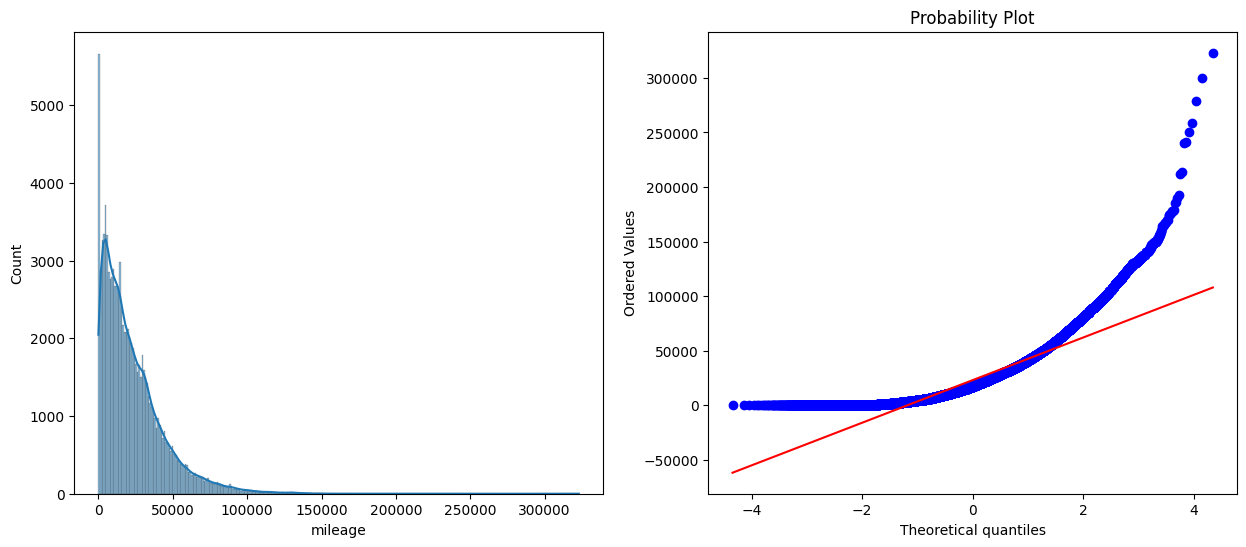

<Axes: xlabel='mileage', ylabel='Count'>

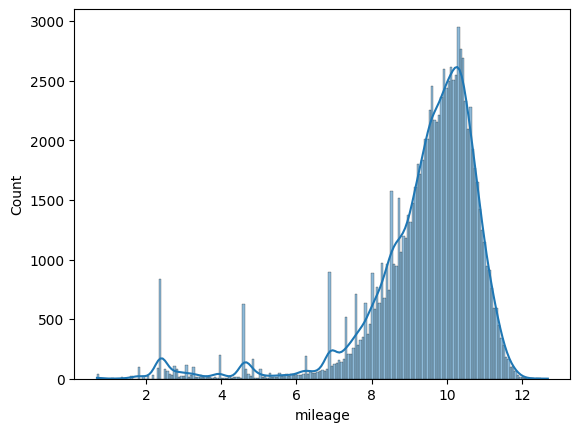

In [69]:
from scipy import stats

fig, axs = plt.subplots(1,2, figsize = (15,6))

sns.histplot(encoding_df["mileage"], ax =axs[0], kde=True)
stats.probplot(encoding_df["mileage"], dist='norm', fit=True, plot=axs[1]) # QQplot

plt.show()

sns.histplot(np.log1p(encoding_df["mileage"]), kde=True)

In [26]:
#랜덤포레스트회귀
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

n_estimators = 100 # 생성할 트리의 개수(default=100)
max_features = 1.0 # 노드를 분할할 때 고려할 특성의 무작위 하위 집합의 크기(default=1.0)
max_depth = None # 트리의 최대 깊이

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 예측  모델 평가
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
accuarcy = rf.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = rf.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 제곱 오차(MSE): {mse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.994
평균 제곱 오차(MSE): 5095989.833
평균 절대비율 오차(MAPE): 0.074
결정 계수(R2): 0.949
정확도: 0.949


In [22]:
#XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

xgb=XGBRegressor()
xgb.fit(X_train, y_train)

# 예측  모델 평가
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
accuarcy = xgb.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = xgb.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 제곱 오차(MSE): {mse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.974
평균 제곱 오차(MSE): 4585837.000
평균 절대비율 오차(MAPE): 0.077
결정 계수(R2): 0.954
정확도: 0.954


In [88]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

X_train, X_test, y_train, y_test = incoding(df)

from sklearn.preprocessing import StandardScaler
num_colums = df.drop(columns=['price'])._get_numeric_data().columns.tolist()
scaler = StandardScaler()
X_train[num_colums] = scaler.fit_transform(X_train[num_colums])
X_test[num_colums] = scaler.transform(X_test[num_colums])


qlr=QuantileRegressor(quantile=0.5, alpha=0) # alpha 제약조건(L1,L2)
qlr.fit(X_train, y_train)

# 예측  모델 평가
y_train_pred = qlr.predict(X_train)
y_test_pred = qlr.predict(X_test)
accuarcy = qlr.score(X_train, y_train) # 샘플값, 실제값
print(f"학습 정확도: {accuarcy:.3f}")
accuarcy = qlr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred) # 실제 y값, 예측값
r2 = r2_score(y_test, y_test_pred) #y_true, y_pred
mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"평균 제곱 오차(MSE): {mse:.3f}")
print(f"평균 절대비율 오차(MAPE): {mape:.3f}")
print(f"결정 계수(R2): {r2:.3f}")
print(f"정확도: {accuarcy:.3f}")

학습 정확도: 0.757
평균 제곱 오차(MSE): 27516661.609
평균 절대비율 오차(MAPE): 0.202
결정 계수(R2): 0.726
정확도: 0.726


In [ ]:
#Log 변환
log_colums = ["mileage", "tax", "mpg"]


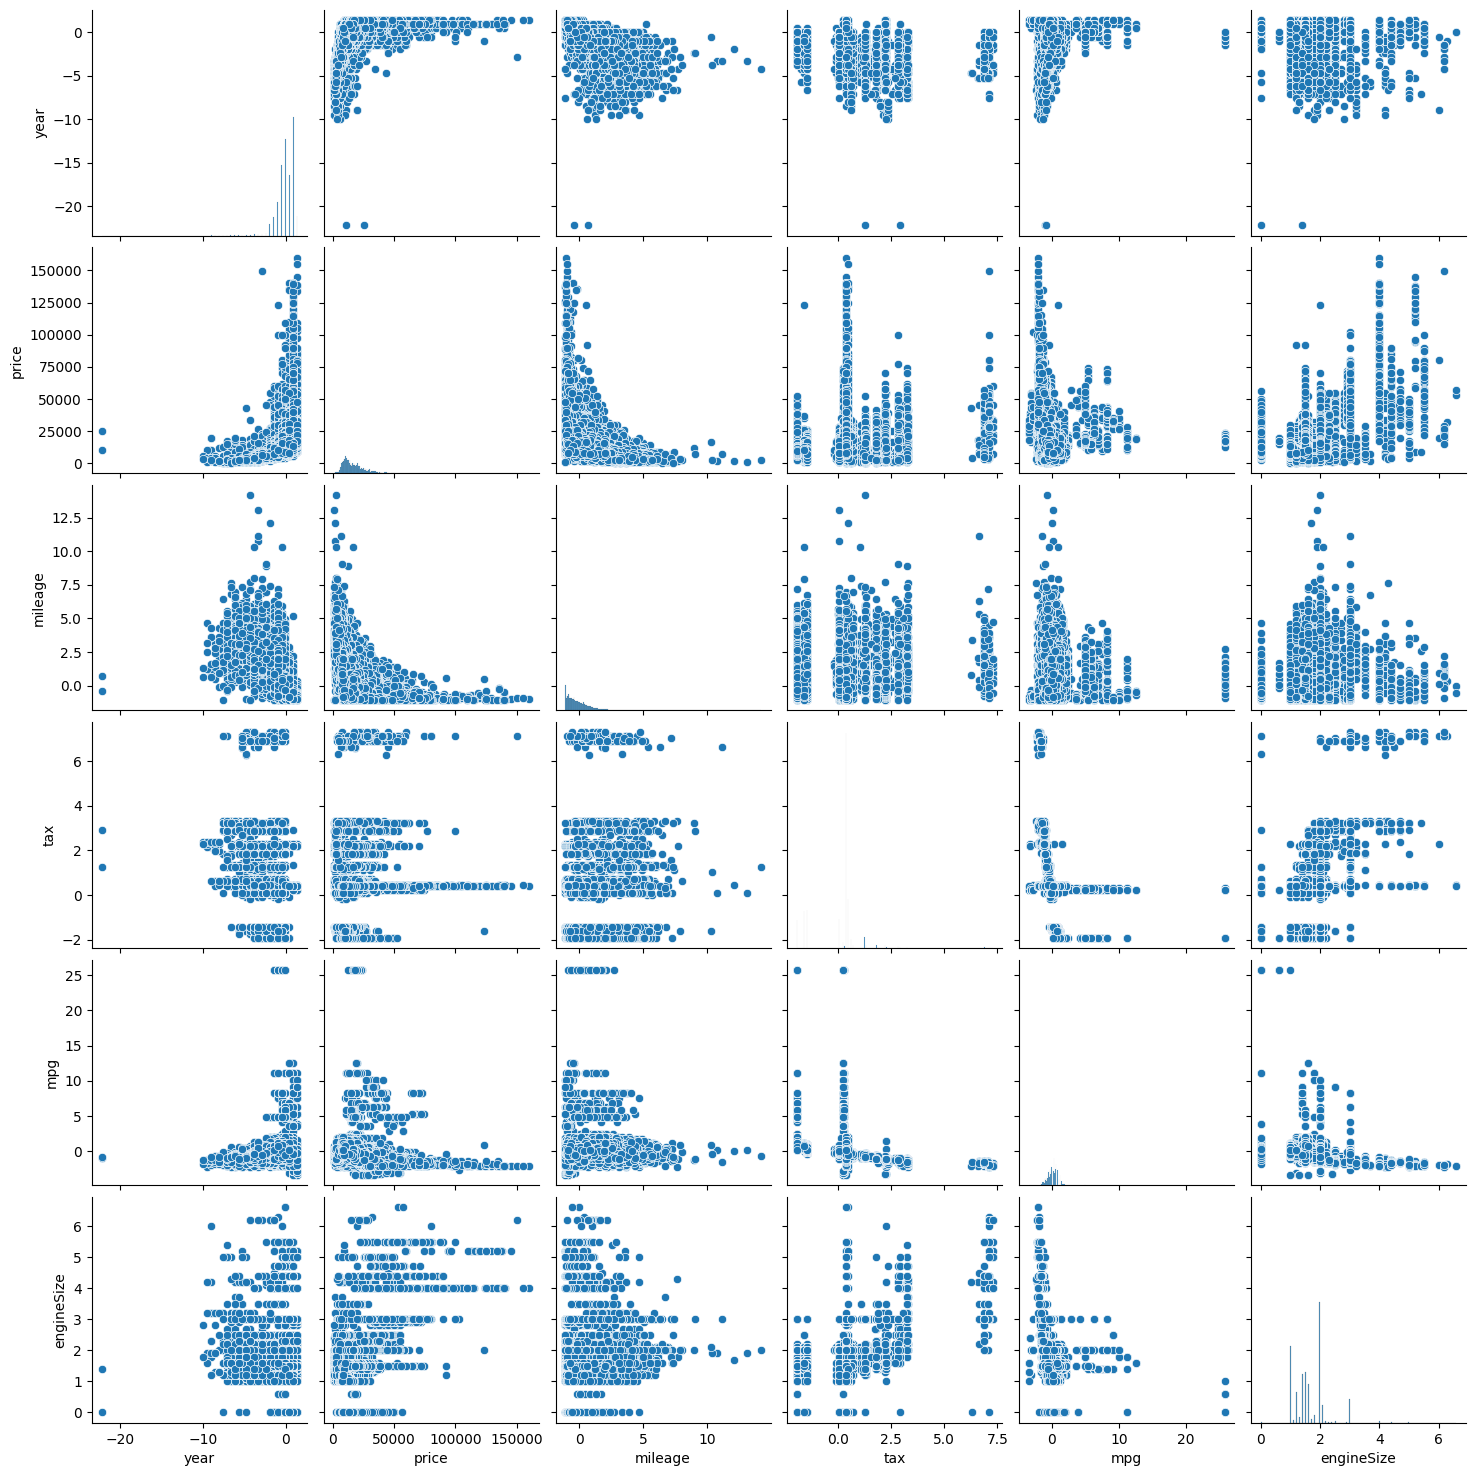

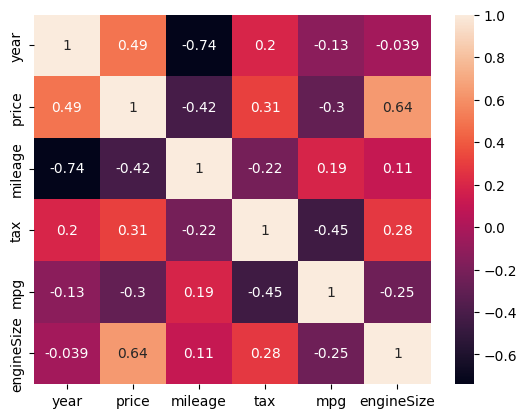

In [65]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler

normalize_columns = ["year", "mileage", "tax", "mpg"]
scaler = StandardScaler()
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

df[normalize_columns].head()

import seaborn as sns
import matplotlib.pyplot as plt
num_colums = df._get_numeric_data().columns.tolist()
correlation_matrix = df[num_colums].corr()
sns.pairplot(df[num_colums])
plt.show()
sns.heatmap(correlation_matrix, annot=True)
plt.show()